In [ ]:
!pip install kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fincher17","key":"66ed96c2db9ae3c74ae3bff7bd919804"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

#Exercise 1: Duplicate Detection And Removal

Objective: Identify and remove duplicate entries in the Titanic dataset.

- Load the Titanic dataset.
- Identify if there are any duplicate rows based on all columns.
- Remove any duplicate rows found in the dataset.
- Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.\
Hint: Use the duplicated() and drop_duplicates() functions in Pandas.

In [7]:
!kaggle datasets download -d brendan45774/test-file

Dataset URL: https://www.kaggle.com/datasets/brendan45774/test-file
License(s): CC0-1.0
  0% 0.00/11.2k [00:00<?, ?B/s]
100% 11.2k/11.2k [00:00<00:00, 24.2MB/s]


In [8]:
!unzip test-file.zip

Archive:  test-file.zip
  inflating: tested.csv              


In [9]:
import pandas as pd
import numpy as np
data = pd.read_csv('tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
duplicate_rows = data.duplicated()
#Create duplicates
data._append(data[415:])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
#Remove duplicates
data.drop_duplicates(subset=['Name'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#Exercise 2: Handling Missing Values

- Identify columns in the Titanic dataset with missing values.
- Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.
- Apply each strategy to different columns based on the nature of the data. \
Hint: Review methods like dropna(), fillna(), and SimpleImputer from scikit-learn.

In [12]:
# Count missing values for each column
for val in data:
  print(f'{val}: {np.sum(data[val].isnull())}')

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


In [13]:
# Drop columns where more than 70% values are absent, in this case it's column Cabin
data.dropna(axis=1, thresh=293, inplace=True)

In [14]:
# Fill in the missing age for middle age
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [15]:
# Drop 1 missin value in Fare column
data.dropna(subset='Fare', inplace=True)

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [17]:
# Check missing values one more time
for val in data:
  print(f'{val}: {np.sum(data[val].isnull())}')

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Embarked: 0


#Exercise 3: Feature Engineering

- Create new features, such as ‘Family Size’ from ‘SibSp’ and ‘Parch’, and ‘Title’ extracted from the ‘Name’ column.
- Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
- Normalize or standardize numerical features if required.\
Hint: Utilize Pandas for data manipulation and scikit-learn’s preprocessing module for encoding.

In [18]:
data['Family Size'] = 1 + data['SibSp'] + data['Parch']
data['Title'] = data['Name'].apply(lambda x: f"{x.split(',')[1]} {x.split(',')[0]}")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Title
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,1,Mr. James Kelly
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,2,Mrs. James (Ellen Needs) Wilkes
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,1,Mr. Thomas Francis Myles
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,1,Mr. Albert Wirz
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,3,Mrs. Alexander (Helga E Lindqvist) Hirvonen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,1,Mr. Woolf Spector
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,1,Dona. Fermina Oliva y Ocana
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,1,Mr. Simon Sivertsen Saether
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,1,Mr. Frederick Ware


In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Title
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,1,1,Mr. James Kelly
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,2,2,Mrs. James (Ellen Needs) Wilkes
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,1,1,Mr. Thomas Francis Myles
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,2,1,Mr. Albert Wirz
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,2,3,Mrs. Alexander (Helga E Lindqvist) Hirvonen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2,1,Mr. Woolf Spector
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0,1,Dona. Fermina Oliva y Ocana
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2,1,Mr. Simon Sivertsen Saether
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,2,1,Mr. Frederick Ware


##Exercise 4: Outlier Detection And Handling

- Use statistical methods to detect outliers in columns like ‘Fare’ and ‘Age’.
- Decide on a strategy to handle the identified outliers, such as capping, transformation, or removal.
- Implement the chosen strategy and assess its impact on the dataset.\
Hint: Explore methods like IQR (Interquartile Range) and Z-score for outlier detection.

In [20]:
# Fare
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
fare_outliers = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]
# Age
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Title
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,1,1,Mr. James Kelly
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,2,2,Mrs. James (Ellen Needs) Wilkes
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,1,1,Mr. Thomas Francis Myles
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,2,1,Mr. Albert Wirz
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,2,3,Mrs. Alexander (Helga E Lindqvist) Hirvonen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2,1,Mr. Woolf Spector
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0,1,Dona. Fermina Oliva y Ocana
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2,1,Mr. Simon Sivertsen Saether
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,2,1,Mr. Frederick Ware


#Exercise 5: Data Standardization And Normalization

- Assess the scale and distribution of numerical columns in the dataset.
- Apply standardization to features with a wide range of values.
- Normalize data that requires a bounded range, like [0, 1].\
Hint: Consider using StandardScaler and MinMaxScaler from scikit-learn’s preprocessing module.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Title,Age_normalized
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,1,1,Mr. James Kelly,0.452723
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,2,2,Mrs. James (Ellen Needs) Wilkes,0.617566
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,1,1,Mr. Thomas Francis Myles,0.815377
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,2,1,Mr. Albert Wirz,0.353818
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,2,3,Mrs. Alexander (Helga E Lindqvist) Hirvonen,0.287881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2,1,Mr. Woolf Spector,0.396975
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0,1,Dona. Fermina Oliva y Ocana,0.512066
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2,1,Mr. Simon Sivertsen Saether,0.505473
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,2,1,Mr. Frederick Ware,0.396975


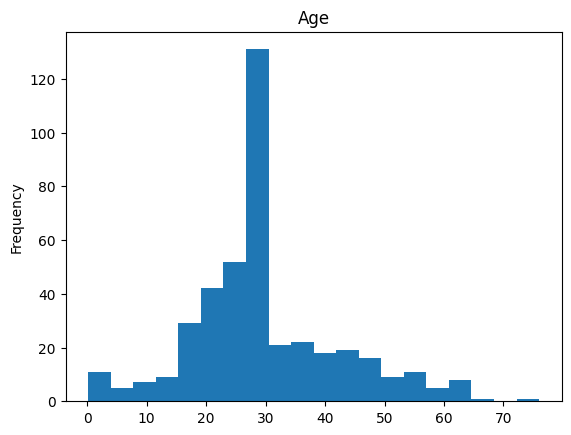

In [21]:
from matplotlib import pyplot as plt
plt1 = data['Age'].plot(kind='hist', bins=20, title='Age')

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Age_normalized'] = scaler.fit_transform(data[['Age']])
data

#Exercise 6: Feature Encoding

- Identify categorical columns in the Titanic dataset, such as ‘Sex’ and ‘Embarked’.
- Use one-hot encoding for nominal variables and label encoding for ordinal variables.
- Integrate the encoded features back into the main dataset.\
Hint: Utilize pandas.get_dummies() for one-hot encoding and LabelEncoder from scikit-learn for label encoding.

## Already done! Look at xercises 3

#Exercise 7: Data Transformation For Age Feature

- Create age groups (bins) from the ‘Age’ column to categorize passengers into different age categories.
- Apply one-hot encoding to the age groups to convert them into binary features.\
Hint: Use pd.cut() for binning the ‘Age’ column and pd.get_dummies() for one-hot encoding.

In [54]:
data['Age category'] = pd.cut(data['Age'], bins=[15, 25, 35, 45, 55, 65, 75], labels=['15-25', '25-35', '35-45', '45-50', '55-65', '65-75'])
data = pd.get_dummies(data, columns = ['Age category'], dtype='int8')
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Family Size,...,Sex_1,Embarked_0,Embarked_1,Embarked_2,Age category_15-25,Age category_25-35,Age category_35-45,Age category_45-50,Age category_55-65,Age category_65-75
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,...,1,0,1,0,0,1,0,0,0,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,2,...,0,0,0,1,0,0,0,1,0,0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,...,1,0,1,0,0,0,0,0,1,0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,...,1,0,0,1,0,1,0,0,0,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,3,...,0,0,0,1,1,0,0,0,0,0
